In [59]:
import pandas as pd
from lshash.lshash import LSHash
import random

#读取csv
data = pd.read_csv('trade.csv')

#将csv中的vipno和pluno两列去重并得到一个list
vipno = data['vipno'].tolist()
vipno = list(set(vipno))

pluno = data['pluno'].tolist()
pluno = list(set(pluno))

#根据之前得到的两个list生产dataframe
frame = pd.DataFrame(index=pluno, columns=vipno)

#将dataframe中的元素全置为0
frame.fillna(0, inplace=True)

#遍历csv并将相应金额填入dataframe
for index, row in data.iterrows():
        frame.at[row['pluno'],row['vipno']] = frame.at[row['pluno'],row['vipno']] + round(row['amt'])

#得到了一个2635*298的dataframe
print(frame.shape)
print(frame)

(2635, 298)
          1590151784960  2900000338432  1595151673856  1591040202244  \
14721025              0              0              0              0   
14721026              0              0              0              0   
14721028              0              0              0              0   
14721030              0              0              0              0   
15004082              0              0              0              0   
14721034              0              0              0              0   
14721035              0              0              0              0   
14721036              0              0              0              0   
14721037              0              0              0              0   
14721038              0              0              0              0   
14721039              0              0              0              0   
14721042              0              0              0              0   
14721044              0              0              

In [61]:
#hashsize为vipno(非重复)总数的0.01的情况
lsh = LSHash(round(len(vipno)*0.01), 2635)
for colname, col in frame.iteritems():
    lsh.index(col.tolist(),colname)

#查找并输出前5个knn
a = lsh.query(frame.T.iloc[random.randint(0,297)].tolist(),5)

print('查询结果')
for i in a:
    print(i[0][1])

查询结果
1598140023120
1590140606433
1590142125499
1591011326672
1590160754770


In [53]:
#hashsize为vipno(非重复)总数的0.05的情况
lsh = LSHash(round(len(vipno)*0.05), 2635)
for colname, col in frame.iteritems():
    lsh.index(col.tolist(),colname)

#查找一个随机vipno的前5个knn并输出
a = lsh.query(frame.T.iloc[random.randint(0,297)].tolist(),5)

print('查询结果')
for i in a:
    print(i[0][1])

1591015252830


In [54]:
#hashsize为vipno(非重复)总数的0.1的情况
lsh = LSHash(round(len(vipno)*0.1), 2635)
for colname, col in frame.iteritems():
    lsh.index(col.tolist(),colname)

#查找一个随机vipno的前5个knn并输出
a = lsh.query(frame.T.iloc[random.randint(0,297)].tolist(),5)

print('查询结果')
for i in a:
    print(i[0][1])

2900003116167


In [55]:
#hashsize为vipno(非重复)总数的0.2的情况
lsh = LSHash(round(len(vipno)*0.2), 2635)
for colname, col in frame.iteritems():
    lsh.index(col.tolist(),colname)

#查找一个随机vipno的前5个knn并输出
a = lsh.query(frame.T.iloc[random.randint(0,297)].tolist(),5)

print('查询结果')
for i in a:
    print(i[0][1])

2900001283175


In [56]:
#hashsize为vipno(非重复)总数的0.3的情况
lsh = LSHash(round(len(vipno)*0.3), 2635)
for colname, col in frame.iteritems():
    lsh.index(col.tolist(),colname)

#查找一个随机vipno的前5个knn并输出
a = lsh.query(frame.T.iloc[random.randint(0,297)].tolist(),5)

print('查询结果')
for i in a:
    print(i[0][1])

1595150512170


In [57]:
#hashsize为vipno(非重复)总数的0.5的情况
lsh = LSHash(round(len(vipno)*0.5), 2635)
for colname, col in frame.iteritems():
    lsh.index(col.tolist(),colname)

#查找一个随机vipno的前5个knn并输出
a = lsh.query(frame.T.iloc[random.randint(0,297)].tolist(),5)

print('查询结果')
for i in a:
    print(i[0][1])

2900000246638


In [79]:
x = []
y = []
for i in range(round(len(vipno)*0.55)):
    x.append(i)
    lsh = LSHash(i, 2635)
    for colname, col in frame.iteritems():
        lsh.index(col.tolist(),colname)
    a = lsh.query(frame.T.iloc[random.randint(0,297)].tolist())
    y.append(len(a))

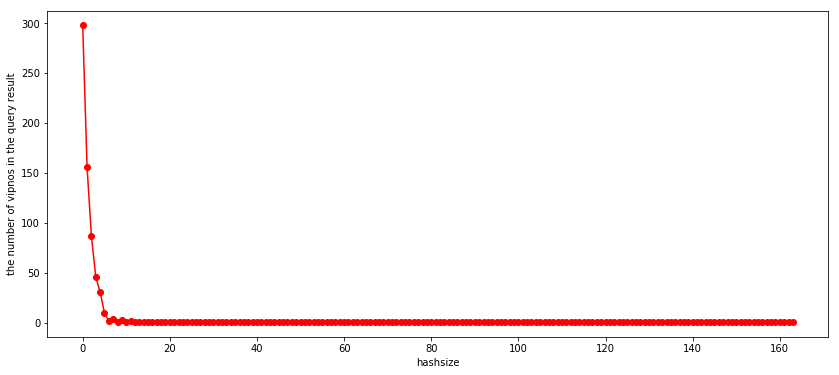

In [77]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(14, 6))
plt.plot(x, y, color='red', marker='o', linestyle='solid')
plt.ylabel("the number of vipnos in the query result")
plt.xlabel("hashsize")
plt.show()